<a href="https://colab.research.google.com/github/svenu96/Sruthy-Venu/blob/main/RF_classifier_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#importing libraries required for the project
import os
import pandas as pd
import numpy as np
import pandas as pd
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define folders containing the CSV files
folder = '/content/drive/MyDrive/task_plot_creation/New_dataset1.csv'

In [5]:
df = pd.read_csv(folder)


In [6]:
mf = pd.DataFrame(df)
columns_to_remove = ['timestamp', 'datetime', 'compulsive', 'user yes/no', 'urge', 'tense', 'ignore']
filtered_data = mf.drop(columns=columns_to_remove)
print(filtered_data)

            acc x     acc y     acc z    gyro x    gyro y    gyro z  relabeled
0       -6.782696  1.578318  7.173084  0.458149 -0.781907  0.763581          0
1       -6.387518  1.374741  7.199429  0.293215 -0.707382  0.879646          0
2       -6.526429  1.161585  6.852151  0.466701 -0.687834  1.080009          0
3       -6.924002  1.223855  6.193520  0.597426 -1.149648  1.464854          0
4       -7.522757  1.537603  6.940767  0.481362 -1.860695  1.671327          0
...           ...       ...       ...       ...       ...       ...        ...
2661181  0.522114 -0.311353  9.881851 -0.004887 -0.008552 -0.001222          0
2661182  0.510139 -0.299377  9.857901 -0.006109 -0.008552 -0.001222          0
2661183  0.447869 -0.323328  9.927357 -0.006109 -0.004887 -0.001222          0
2661184  0.390388 -0.301772  9.838740 -0.003665 -0.007330  0.001222          0
2661185  0.531694 -0.246687  9.857901 -0.007330 -0.007330  0.000000          0

[2661186 rows x 7 columns]


In [12]:
# Filter data for one handwash event
#handwash_data = df[df['user yes/no'] ==  1]

#filtered_data = mf[(mf['relabeled'] == 2) & (mf['ignore'] == 0)]

#values = handwash_data.count()
values = filtered_data.count()
print(values)

acc x        2661186
acc y        2661186
acc z        2661186
gyro x       2661186
gyro y       2661186
gyro z       2661186
relabeled    2661186
label        2661186
dtype: int64


In [8]:
print(filtered_data)

            acc x     acc y     acc z    gyro x    gyro y    gyro z  relabeled
0       -6.782696  1.578318  7.173084  0.458149 -0.781907  0.763581          0
1       -6.387518  1.374741  7.199429  0.293215 -0.707382  0.879646          0
2       -6.526429  1.161585  6.852151  0.466701 -0.687834  1.080009          0
3       -6.924002  1.223855  6.193520  0.597426 -1.149648  1.464854          0
4       -7.522757  1.537603  6.940767  0.481362 -1.860695  1.671327          0
...           ...       ...       ...       ...       ...       ...        ...
2661181  0.522114 -0.311353  9.881851 -0.004887 -0.008552 -0.001222          0
2661182  0.510139 -0.299377  9.857901 -0.006109 -0.008552 -0.001222          0
2661183  0.447869 -0.323328  9.927357 -0.006109 -0.004887 -0.001222          0
2661184  0.390388 -0.301772  9.838740 -0.003665 -0.007330  0.001222          0
2661185  0.531694 -0.246687  9.857901 -0.007330 -0.007330  0.000000          0

[2661186 rows x 7 columns]


KeyboardInterrupt: ignored

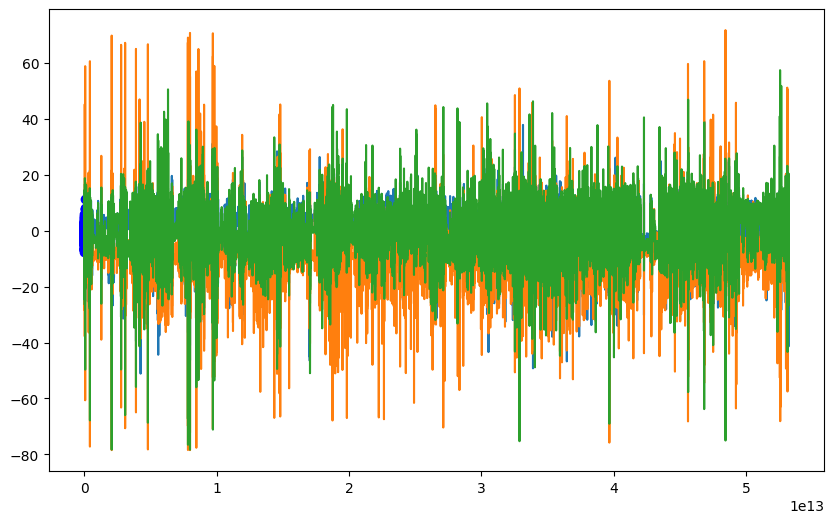

In [19]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accelerometer data
ax.plot(mf['timestamp'], mf['acc x'], label='Acc X')
ax.plot(mf['timestamp'], mf['acc y'], label='Acc Y')
ax.plot(mf['timestamp'], mf['acc z'], label='Acc Z')

# Markers for routine/compulsive behavior
for index, row in mf.iterrows():
    color = 'b' #if row['compulsive'] == 0 else 'r'
    marker = 'o' #if row['compulsive'] == 0 else 'x'
    ax.scatter(row['timestamp'], row['acc x'], color=color, marker=marker)

# Set labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Accelerometer Data')
ax.set_title('Handwash Event')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [10]:
filtered_data['label'] = filtered_data['relabeled']  # Create a 'label' column for majority voting

In [11]:
label_counts = filtered_data['label'].value_counts()
count_label_0 = label_counts.get(0, 0)  # Count of label 0, default to 0 if not found
count_label_1 = label_counts.get(1, 0)  # Count of label 1, default to 0 if not found
count_label_2 = label_counts.get(2, 0)  # Count of label 2, default to 0 if not found

print(count_label_0)
print(count_label_1)
print(count_label_2)

2626968
22812
11406


In [13]:
# Separate data for each label
data_label_0 = filtered_data[filtered_data['label'] == 0]
data_label_1 = filtered_data[filtered_data['label'] == 1]
data_label_2 = filtered_data[filtered_data['label'] == 2]

In [14]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=10)
X_label_0_undersampled, y_label_0_undersampled = undersampler.fit_resample(filtered_data.iloc[:, :-1], filtered_data['label'])

In [15]:
# Create a new DataFrame with the undersampled data
undersampled_data = pd.DataFrame(X_label_0_undersampled, columns=filtered_data.columns[:-1])
undersampled_data['label'] = y_label_0_undersampled

In [23]:
values = undersampled_data.count()
print(values)

acc x        34218
acc y        34218
acc z        34218
gyro x       34218
gyro y       34218
gyro z       34218
relabeled    34218
label        34218
dtype: int64


In [16]:
# Verify the class distribution
undersampled_label_counts = undersampled_data['label'].value_counts()
print(undersampled_label_counts)

0    11406
1    11406
2    11406
Name: label, dtype: int64


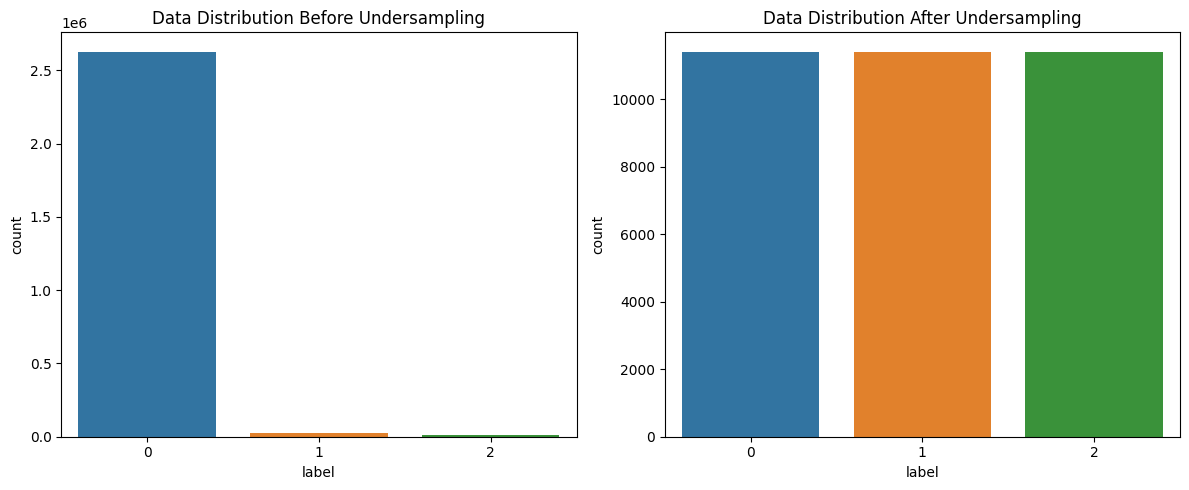

In [20]:
# Plot the data distribution before and after undersampling
plt.figure(figsize=(12, 5))

# Plot before undersampling
plt.subplot(1, 2, 1)
sns.countplot(data=filtered_data, x='label')
plt.title('Data Distribution Before Undersampling')

# Plot after undersampling
plt.subplot(1, 2, 2)
sns.countplot(data=undersampled_data, x='label')
plt.title('Data Distribution After Undersampling')

plt.tight_layout()
plt.show()

In [21]:
# Split data into train and test sets
train_data, test_data = train_test_split(undersampled_data, test_size=0.4, random_state=42)
print(f"Number of train DataFrames: {len(train_data)}")
print(f"Number of test DataFrames: {len(test_data)}")

Number of train DataFrames: 20530
Number of test DataFrames: 13688


In [24]:
# Define window size
window_size = 150

# Initialize lists to store windowed data and labels
train_windows = []
train_labels = []
test_windows = []
test_labels = []
i=0

In [25]:
window = train_data.iloc[0:i+window_size, :-1]  # Select only sensor axes columns

label_window = train_data.iloc[i:i+window_size, -1]  # Select the label column for majority voting
majority_label = np.bincount(label_window).argmax()  # Majority voting
print(window.shape)
print(window)
print(label_window.shape)
print(majority_label.shape)

(150, 7)
          acc x      acc y      acc z    gyro x    gyro y    gyro z  relabeled
14538 -1.573528  -9.910591  -2.936294 -0.180816 -0.083078 -0.020769          1
22902  6.677315  -8.964559  -2.246528 -0.432492  2.157575 -0.188146          2
13710 -2.917134  -4.296665  -9.089100 -2.938261 -0.267559  0.448375          1
16674 -1.875300  -5.851033  -4.471502 -3.387857  0.460592  0.835663          1
31400 -9.671089  -4.083508  -2.124382 -3.825237 -0.103847 -3.870441          2
...         ...        ...        ...       ...       ...       ...        ...
33471  0.045505  -6.708450 -11.069780  8.607088  1.913229  0.918741          2
6781   0.414338 -10.899734   3.676355  1.031140 -0.079412 -3.626095          0
1194  -2.265689  -5.242698  -7.853270  0.535118  0.197920  0.040317          0
11811 -3.582949 -10.063872  -0.045505 -0.157603 -0.173486 -0.057421          1
33305 -1.978286   8.650811  -8.248447  8.614418 -4.284607 -0.574213          2

[150 rows x 7 columns]
(150,)
()


In [26]:
clf = RandomForestClassifier(n_estimators=100)

In [27]:
# Generate windows and labels using a sliding window approach
for i in range(0,len(train_data)-window_size+1,window_size):
    window = train_data.iloc[i:i+window_size, :-1]  # Select only sensor axes columns
    train_windows.append(window)
    label_window = train_data.iloc[i:i+window_size, -1]  # Select the label column for majority voting
    majority_label = np.bincount(label_window).argmax()  # Majority voting
    train_labels.append(majority_label)

In [28]:
# Convert lists to numpy arrays
train_windows = np.array(train_windows)
train_labels = np.array(train_labels)

In [29]:
# Flatten the sensor axes data in each window
train_windows = train_windows.reshape(train_windows.shape[0], -1)

In [30]:
clf.fit(train_windows, train_labels)

RandomForestClassifier()

In [31]:
# Generate windows and labels using a sliding window approach
#for i in range(0, len(train_data) - window_size + 1):
for i in range(0,len(test_data)-window_size+1, window_size):
    window = test_data.iloc[i:i+window_size, :-1]  # Select only sensor axes columns
    test_windows.append(window)
    label_window = test_data.iloc[i:i+window_size, -1]  # Select the label column for majority voting
    majority_label = np.bincount(label_window).argmax()  # Majority voting
    test_labels.append(majority_label)

In [32]:
test_windows = np.array(test_windows)

In [33]:
test_windows_flattened = test_windows.reshape(test_windows.shape[0], -1)

# Make predictions using the trained classifier
predictions = clf.predict(test_windows_flattened)

# Calculate accuracy and F1 score
accuracy = accuracy_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions, average='weighted')

In [34]:
print(np.mean(test_labels))

1.065934065934066


In [35]:
print(accuracy)
print(f1)

0.2967032967032967
0.2656167362049715


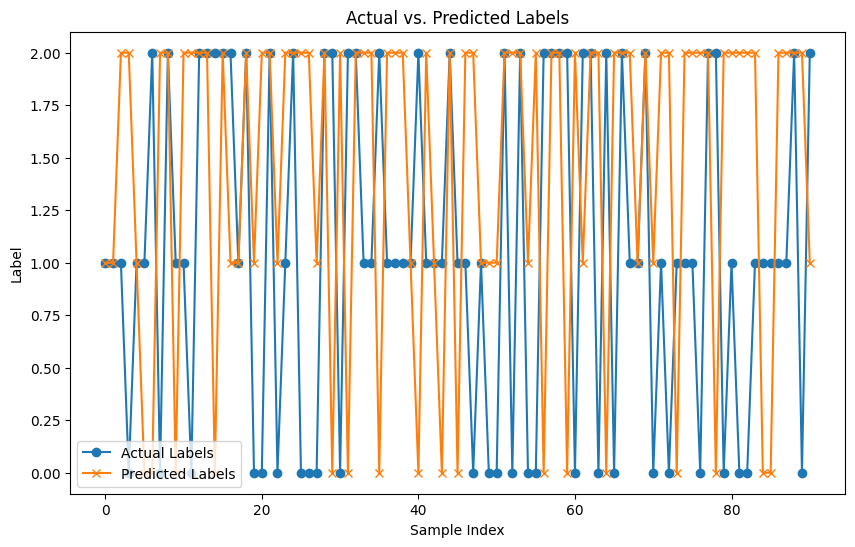

In [36]:
# Plot actual vs. predicted labels
plt.figure(figsize=(10, 6))
plt.plot(test_labels, label='Actual Labels', marker='o')
plt.plot(predictions, label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()